# This notebook to understand the concept of cross validation and its python code

In [29]:
data = ['abc', 'shsjdf', 'sssd', 0.4, 0.5]

In [30]:
from sklearn.model_selection import KFold

In [31]:
%config Completer.use_jedi = False

In [32]:
Kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [33]:
for train, test in Kfold.split(data):
    print (train,test)

[0 1 3 4] [2]
[0 2 3 4] [1]
[0 1 2 3] [4]
[1 2 3 4] [0]
[0 1 2 4] [3]


Ideal: 0.840
> folds=2, accuracy=0.740 (0.700,0.780)
> folds=3, accuracy=0.749 (0.697,0.824)
> folds=4, accuracy=0.790 (0.640,0.920)
> folds=5, accuracy=0.810 (0.600,0.950)
> folds=6, accuracy=0.820 (0.688,0.941)
> folds=7, accuracy=0.799 (0.571,1.000)
> folds=8, accuracy=0.811 (0.385,0.923)
> folds=9, accuracy=0.829 (0.636,1.000)
> folds=10, accuracy=0.850 (0.600,1.000)
> folds=11, accuracy=0.829 (0.667,1.000)
> folds=12, accuracy=0.785 (0.250,1.000)
> folds=13, accuracy=0.839 (0.571,1.000)
> folds=14, accuracy=0.807 (0.429,1.000)
> folds=15, accuracy=0.821 (0.571,1.000)
> folds=16, accuracy=0.827 (0.500,1.000)
> folds=17, accuracy=0.816 (0.600,1.000)
> folds=18, accuracy=0.831 (0.600,1.000)
> folds=19, accuracy=0.826 (0.600,1.000)
> folds=20, accuracy=0.830 (0.600,1.000)
> folds=21, accuracy=0.814 (0.500,1.000)
> folds=22, accuracy=0.820 (0.500,1.000)
> folds=23, accuracy=0.802 (0.250,1.000)
> folds=24, accuracy=0.804 (0.250,1.000)
> folds=25, accuracy=0.810 (0.250,1.000)
> folds=26,

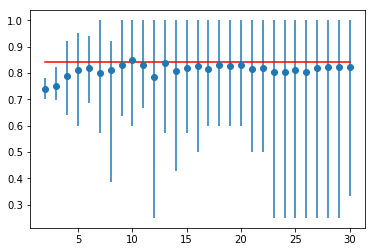

In [35]:
# Credit - https://machinelearningmastery.com/

# sensitivity analysis of k in k-fold cross-validation
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# create the dataset
def get_dataset(n_samples=100):
    X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    return X, y

# retrieve the model to be evaluate
def get_model():
    model = LogisticRegression()
    return model

# evaluate the model using a given test condition
def evaluate_model(cv):
    # get the dataset
    X, y = get_dataset()
    # get the model
    model = get_model()
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores), scores.min(), scores.max()

# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

In [46]:
>>> from sklearn import datasets, linear_model
>>> from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.metrics import r2_score
>>> diabetes = datasets.load_diabetes()
>>> X = diabetes.data[:150]
>>> y = diabetes.target[:150]
>>> lasso = linear_model.Lasso()
>>> score = cross_validate(lasso, X, y, cv=3)

# r2_score(y, y_pred)
score

{'fit_time': array([0.00401545, 0.00099707, 0.00199509]),
 'score_time': array([0.00099707, 0.0012958 , 0.        ]),
 'test_score': array([0.33150734, 0.08022311, 0.03531764])}

In [44]:
y_pred, y

(array([174.26933996, 117.6539241 , 164.60228641, 155.65049088,
        132.68647979, 128.49511245, 120.76146877, 141.069413  ,
        164.18904498, 182.37394949, 111.04181265, 127.94311443,
        135.0869234 , 162.83066014, 135.3573514 , 157.64516523,
        178.95843326, 163.3919841 , 143.85237903, 144.29748882,
        133.58117218, 124.77928571, 132.90918003, 208.52927   ,
        153.61908967, 154.16616341, 118.95351821, 163.50467541,
        145.89406196, 168.3308101 , 155.87411031, 123.45960148,
        185.70459144, 133.38468582, 117.2789469 , 150.27895019,
        174.1541028 , 160.03235091, 192.31389633, 161.58568256,
        154.2224809 , 119.35517679, 146.15706413, 133.82056934,
        179.68118754, 137.96619936, 146.07788398, 126.77579723,
        123.32101099, 166.26710247, 146.41559964, 161.67261029,
        147.47731459, 138.44595305, 144.85421048, 113.77990664,
        185.54970402, 115.31624749, 142.23672103, 171.07792136,
        132.5394716 , 177.80524864, 116.